In [1]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.io import readsav
import IMA2
import math
from scipy.stats import linregress


N=11

/usr/local/lib/python3.4/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
bouguer=readsav('TD2_Bouguer.save')
print(bouguer.keys())
print(bouguer.etoiles)
#print(bouguer.donnees)
#print(bouguer.donnees.hauteur)
#print(bouguer.donnees.hauteur[0][0][1])


/usr/lib/python3/dist-packages/scipy/io/idl.py:167: UserWarning: warning: empty strings are now set to '' instead of None
  warnings.warn("warning: empty strings are now set to '' instead of None")


dict_keys(['donnees', 'etoiles'])
[ (b'HD 41940', b'B8', 10.569999694824219, 10.5, 10.529999732971191, 5300, 3852)
 (b'HD 252237', b'A0', 9.84000015258789, 10.010000228881836, 10.119999885559082, 3190, 2026)
 (b'HD 252202', b'A0', 10.600000381469727, 10.609999656677246, 10.649999618530273, 6882, 7338)
 (b'TYC 1877-0372-1', b'B4', 10.850000381469727, 10.430000305175781, 10.3100004196167, 6478, 7320)
 (b'HD 251753', b'K4', 11.029999732971191, 10.6899995803833, 10.550000190734863, 3239, 400)
 (b'HD 252199', b'A0V', 12.770000457763672, 12.170000076293945, 11.84000015258789, 641, 1408)
 (b'TYC 1881-0225-1', b'B9', 11.260000228881836, 10.800000190734863, 10.5600004196167, 767, 2824)
 (b'TYC 1881-0518-1', b'A0', 11.8100004196167, 10.1899995803833, 9.800000190734863, 2793, 4071)
 (b'TYC 1881-0339-1', b'A0V', 10.119999885559082, 9.779999732971191, 9.449999809265137, 2951, 4198)
 (b'TYC 1881-0339-1', b'A0V', 10.300000190734863, 10.260000228881836, 10.279999732971191, 6721, 1944)
 (b'TYC 1881-033

Format : Nom, , MB, MV, MR, X, Y
donnees.image.(b/v/r) ou donnees.hauteur...



In [3]:
M_air=np.zeros((N,3))
m_cat=np.zeros((N,3))
for x in range(0,N):
    for i in range(0,3):
        M_air[x,i]=1/(math.sin(math.radians(bouguer.donnees.hauteur[x][0][i])))
        m_cat[x,i]=bouguer.etoiles[x][i+2]

print(M_air)
#M_air[:,0]=bleu
#M_air[:,1]=vert
#M_air[:,2]=rouge
print(m_cat)

[[ 1.07000009  1.08500008  1.09499999]
 [ 1.10000002  1.11500003  1.12499996]
 [ 1.13999999  1.15499998  1.16499998]
 [ 1.07999998  1.09499999  1.105     ]
 [ 1.7999998   1.81500018  1.82500006]
 [ 1.34999996  1.36499988  1.37499992]
 [ 1.59999991  1.61499995  1.62499982]
 [ 1.20000003  1.21500001  1.22499999]
 [ 1.04999992  1.06499997  1.07499991]
 [ 1.02199998  1.03699996  1.04699994]
 [ 2.19999954  2.2150001   2.2249997 ]]
[[ 10.56999969  10.5         10.52999973]
 [  9.84000015  10.01000023  10.11999989]
 [ 10.60000038  10.60999966  10.64999962]
 [ 10.85000038  10.43000031  10.31000042]
 [ 11.02999973  10.68999958  10.55000019]
 [ 12.77000046  12.17000008  11.84000015]
 [ 11.26000023  10.80000019  10.56000042]
 [ 11.81000042  10.18999958   9.80000019]
 [ 10.11999989   9.77999973   9.44999981]
 [ 10.30000019  10.26000023  10.27999973]
 [ 10.88000011  10.56999969  10.43999958]]


In [4]:

center=[[250,250],[247,248],[251,247],[251,246],[250,250],[250,250],[250,250],[249,249],[250,251],[250,256],[250,250]]

adu_r=[]
adu_v=[]
adu_b=[]

for i in range(0,N):
  [Int,Fl,mg]=IMA2.photometrie(bouguer.donnees.image[i].b[0],[250,246],10,15,25, plot=0)
  adu_b.append(Int)
  [Int,Fl,mg]=IMA2.photometrie(bouguer.donnees.image[i].r[0],[250,246],10,15,25, plot=0)
  adu_r.append(Int)
  [Int,Fl,mg]=IMA2.photometrie(bouguer.donnees.image[i].v[0],[250,246],10,15,25,plot=0)
  adu_v.append(Int)


Aires analysées : centre :  317  pixels ; couronne :  1252  pixels
Intensité mesurée :  1625840.16027  ADU
Intensité de la cible :  5237.15457413  ADU/pixel ; Intensité du fond :  108.321260982  ADU/pixel
Aires analysées : centre :  317  pixels ; couronne :  1252  pixels
Intensité mesurée :  3187543.24755  ADU
Intensité de la cible :  10312.0725552  ADU/pixel ; Intensité du fond :  256.731080272  ADU/pixel
Aires analysées : centre :  317  pixels ; couronne :  1252  pixels
Intensité mesurée :  2674934.79982  ADU
Intensité de la cible :  8619.38485804  ADU/pixel ; Intensité du fond :  181.104732428  ADU/pixel
Aires analysées : centre :  317  pixels ; couronne :  1252  pixels
Intensité mesurée :  3209529.19289  ADU
Intensité de la cible :  10264.8682965  ADU/pixel ; Intensité du fond :  140.170527157  ADU/pixel
Aires analysées : centre :  317  pixels ; couronne :  1252  pixels
Intensité mesurée :  4535780.34457  ADU
Intensité de la cible :  14625.0899054  ADU/pixel ; Intensité du fond :  

| * | ADU R | ADU B | ADU V | Sature |
|-----------------|---------|---------|---------|--------|
| HD 41940 | 3187543 | 1625840 | 2674934 | Non |
| HD 252237 | 4535780 | 3209529 | 3956502 | Non |
| HD 252202 | 2808925 | 1574952 | 2268236 | Non |
| TYC 1877-0372-1 | 3474768 | 1258676 | 2657521 | Non |
| HD 251753 | 2718000 | 802927 | 1812519 | Non |
| HD 252199 | 876092 | 190410 | 524120 | NOn |
| TYC 1881-0225-1 | 2917922 | 726553 | 1784847 | NOn |
| TYC 1881-0518-1 | 4706162 | 492823 | 3449059 | Non |
| TYC 1881-0339-1 | 3861670 | 2296130 | 3145718 | R/V/B |
| TYC 1881-0339-1 | 788509 | 566900 | 608917 | R/V/B |
| TYC 1881-0339-1 | 3059438 | 819062 | 2051485 | R/V/B |

On observe une saturation sur les 3 dernières étoiles

In [5]:
m_instb=100-2.5*np.log10(adu_b)
m_instr=100-2.5*np.log10(adu_r)
m_instv=100-2.5*np.log10(adu_v)

print(adu_b)
print(m_instb)


[1625840.1602685703, 3209529.1928913738, 1574952.845734325, 1258676.991014377, 802927.98128619208, 190410.83575653954, 726553.23086187104, 492823.58964406949, 2296130.5441793129, 566900.6914031225, 819062.1247067193]
[ 84.47230538  83.73389667  84.50683111  84.75021427  85.23830852
  86.80077085  85.3468314   85.76827128  84.09750856  85.61623253
  85.21670789]


(11,) (11,)


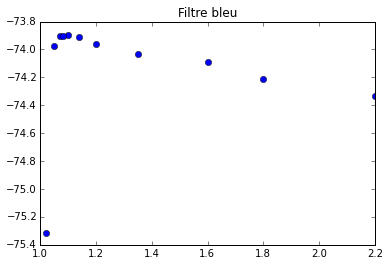

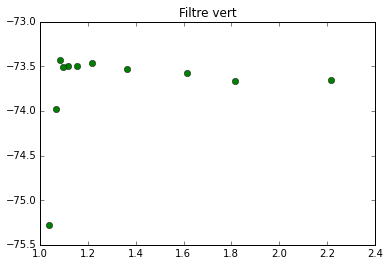

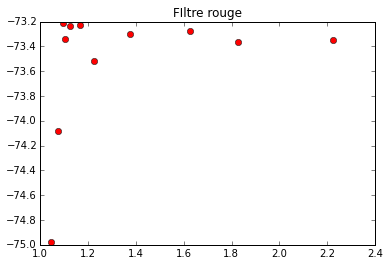

In [6]:
print(m_instb.shape, M_air[:,1].shape)
plt.plot(M_air[:,0],m_cat[:,0]-m_instb,'bo')
plt.title('Filtre bleu')
plt.figure()
plt.plot(M_air[:,1],m_cat[:,1]-m_instv,'go')
plt.title('Filtre vert')
plt.figure()
plt.plot(M_air[:,2],m_cat[:,2]-m_instr,'ro')
plt.title('FIltre rouge')

Q6: On obtient des points abérrants (notamment les premiers points très en deça des autres) il peut s'agir d'étoiles ayant saturées. Notamment la 9ème et 8ème étoile.


Q7: On a comme formule $ m_{cat} =m_{inst} + Z + \kappa M$, en traçant $ m_{cat} - m_{inst} $ on obtiens l'équation d'une droite $Z + \kappa M$, il est donc logique d'utiliser une méthode de régression linéaire.

In [7]:
[kb,Zb, r_b, p_b, std_err_b] = linregress(M_air[:,0],m_cat[:,0]-m_instb)
[kv,Zv, r_v, p_v, std_err_v ]= linregress(M_air[:,1],m_cat[:,1]-m_instv)
[kr,Zr, r_r, p_r, std_err_r] = linregress(M_air[:,2],m_cat[:,2]-m_instr)

print('kb={0:.3f} et Zb={1:.3f}'.format(kb, Zb))
print('kv={0:.3f} et Zv={1:.3f}'.format(kv, Zv))
print('kr={0:.3f} et Zr={1:.3f}'.format(kr, Zr))

kb=-0.080 et Zb=-74.032
kv=0.294 et Zv=-74.129
kr=0.448 et Zr=-74.142


In [8]:
#Tri
ind_b=np.argsort(M_air[:,0])
ind_v=np.argsort(M_air[:,1])
ind_r=np.argsort(M_air[:,2])
#On enlève les points aberrants
ind_b=ind_b[1:10]
ind_v=ind_v[2:10]
ind_r=ind_r[2:10]


[kb_corr,Zb_corr, r, p, std_err_b] = linregress(M_air[ind_b,0],m_cat[ind_b,0]-m_instb[ind_b])
[kv_corr,Zv_corr, r, p, std_err_v] = linregress(M_air[ind_v,1],m_cat[ind_v,1]-m_instv[ind_v])
[kr_corr,Zr_corr, r, p, std_err_r] = linregress(M_air[ind_r,2],m_cat[ind_r,2]-m_instr[ind_r])

#resultat regression linéaire sans points abérrants
print('kb_corrige={0:.3f} et Zb_corrige={1:.3f}'.format(kb_corr, Zb_corr))
print('kv_corrige={0:.3f} et Zv_corrige={1:.3f}'.format(kv_corr, Zv_corr))
print('kr_corrige={0:.3f} et Zr_corrige={1:.3f}'.format(kr_corr, Zr_corr))

kb_corrige=-0.381 et Zb_corrige=-73.503
kv_corrige=-0.239 et Zv_corrige=-73.209
kr_corrige=-0.077 et Zr_corrige=-73.208


(11,) (11,)


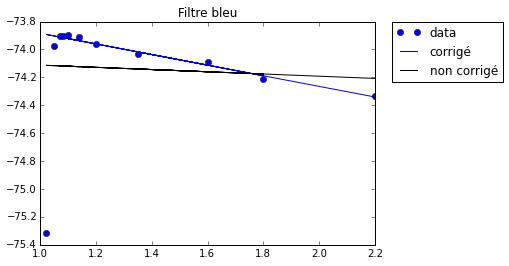

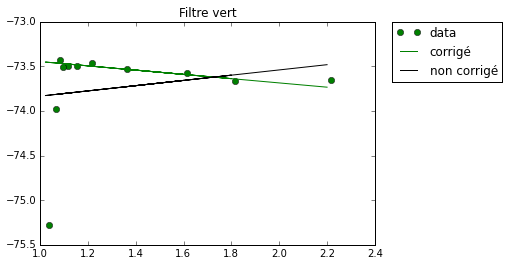

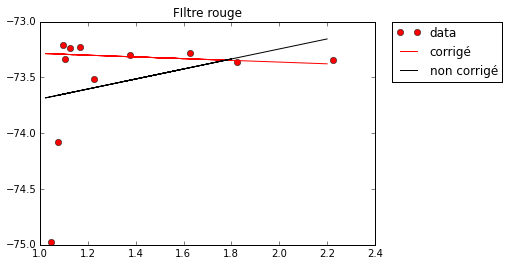

In [9]:
print(m_instb.shape, M_air[:,1].shape)
plt.plot(M_air[:,0],m_cat[:,0]-m_instb,'bo', label='data')
plt.plot(M_air[:,0], Zb_corr+kb_corr*M_air[:,0],'b', label='corrigé')
plt.plot(M_air[:,0], Zb+kb*M_air[:,0],'black', label='non corrigé')
plt.title('Filtre bleu')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure()
plt.plot(M_air[:,1],m_cat[:,1]-m_instv,'go', label='data')
plt.plot(M_air[:,0], Zv_corr+kv_corr*M_air[:,0],'g', label='corrigé')
plt.plot(M_air[:,0], Zv+kv*M_air[:,0], 'black', label='non corrigé')
plt.title('Filtre vert')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure()
plt.plot(M_air[:,2],m_cat[:,2]-m_instr,'ro', label='data')
plt.plot(M_air[:,0], Zr_corr+kr_corr*M_air[:,0],'r', label='corrigé')
plt.plot(M_air[:,0], Zr+kr*M_air[:,0],'black', label='non corrigé')
plt.title('FIltre rouge')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
filtres=readsav('TD2_Filtres.save')
print(filtres.keys(), np.shape(filtres['trouge']))

dict_keys(['tv', 'ti', 'qe', 'tb', 'trouge', 'lambda', 'tvert', 'tbleu', 'tr', 'tu']) (800,)


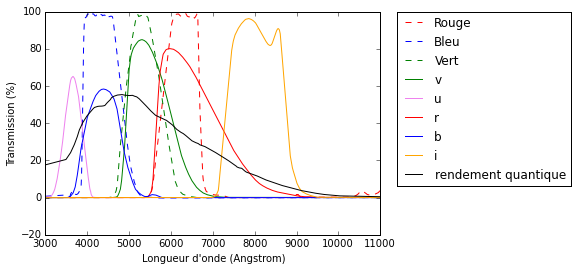

In [11]:
plt.figure()
plt.plot(filtres['lambda'], filtres['trouge'],'r--', label='Rouge')
plt.plot(filtres['lambda'], filtres['tbleu'],'b--', label='Bleu')
plt.plot(filtres['lambda'], filtres['tvert'],'g--',label='Vert')
plt.plot(filtres['lambda'], filtres['tv'],'g', label='v')
plt.plot(filtres['lambda'], filtres['tu'],'violet', label='u')
plt.plot(filtres['lambda'], filtres['tr'],'r', label='r')
plt.plot(filtres['lambda'], filtres['tb'],'b', label='b')
plt.plot(filtres['lambda'], filtres['ti'],'orange',label='i')
plt.plot(filtres['lambda'], filtres['qe'],'black',label='rendement quantique')
plt.xlabel('Longueur d\'onde (Angstrom)')
plt.ylabel('Transmission (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

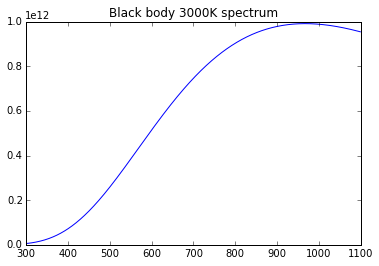

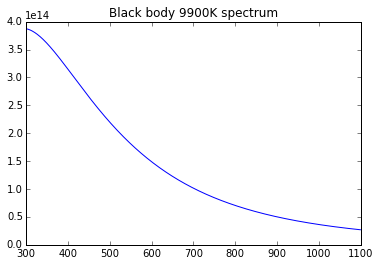

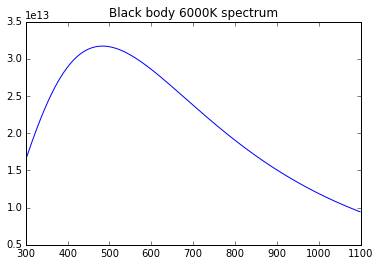

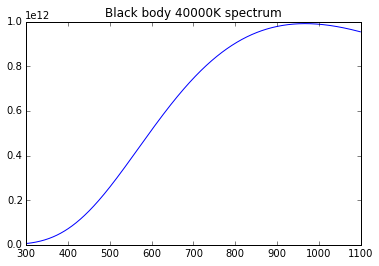

In [12]:
CN_3K=IMA2.planck(filtres['lambda']*(10**-10), 3000)
CN_6K=IMA2.planck(filtres['lambda']*(10**-10), 6000)
CN_9K=IMA2.planck(filtres['lambda']*(10**-10), 9900)
CN_40K=IMA2.planck(filtres['lambda']*(10**-10), 40000)

plt.figure()
plt.plot(filtres['lambda']/10, CN_3K, label='3000K')
plt.title('Black body 3000K spectrum')
plt.figure()
plt.plot(filtres['lambda']/10, CN_9K, label='9900K')
plt.title('Black body 9900K spectrum')
plt.figure()
plt.plot(filtres['lambda']/10, CN_6K, label='6000K')
plt.title('Black body 6000K spectrum')
plt.figure()
plt.plot(filtres['lambda']/10, CN_3K, label='40000K')
plt.title('Black body 40000K spectrum')

Q12: 
* Le spectre à 3000K représente une étoile rouge-IR (car son maximum se situe dans cette zone de longueur d'onde)
* Le spectre 6000K est une étoile plutôt UV
* Le spectre 9900K est une étoile verte
* Le spectre 40000K est une étoile IR.


On fait $\int_{0}^{\infty}CN*Transmission(\lambda)*\lambda*rendementQ(\lambda)$

In [13]:
#A faire peut-etre sous forme de dictionnaire/liste pour simplifier

Na_650_3k=(CN_3K*filtres['trouge']*filtres['lambda']*filtres['qe']).sum()
Na_450_3k=(CN_3K*filtres['tbleu']*filtres['lambda']*filtres['qe']).sum()
Na_550_3k=(CN_3K*filtres['tvert']*filtres['lambda']*filtres['qe']).sum()

Na_650_6k=(CN_6K*filtres['trouge']*filtres['lambda']*filtres['qe']).sum()
Na_450_6k=(CN_6K*filtres['tbleu']*filtres['lambda']*filtres['qe']).sum()
Na_550_6k=(CN_6K*filtres['tvert']*filtres['lambda']*filtres['qe']).sum()

Na_650_9k=(CN_9K*filtres['trouge']*filtres['lambda']*filtres['qe']).sum()
Na_450_9k=(CN_9K*filtres['tbleu']*filtres['lambda']*filtres['qe']).sum()
Na_550_9k=(CN_9K*filtres['tvert']*filtres['lambda']*filtres['qe']).sum()

Na_650_40k=(CN_40K*filtres['trouge']*filtres['lambda']*filtres['qe']).sum()
Na_450_40k=(CN_40K*filtres['tbleu']*filtres['lambda']*filtres['qe']).sum()
Na_550_40k=(CN_40K*filtres['tvert']*filtres['lambda']*filtres['qe']).sum()


Nj_650_3k=(CN_3K*filtres['tr']*filtres['lambda']*filtres['qe']).sum()
Nj_450_3k=(CN_3K*filtres['tb']*filtres['lambda']*filtres['qe']).sum()
Nj_550_3k=(CN_3K*filtres['tv']*filtres['lambda']*filtres['qe']).sum()

Nj_650_6k=(CN_6K*filtres['tr']*filtres['lambda']*filtres['qe']).sum()
Nj_450_6k=(CN_6K*filtres['tb']*filtres['lambda']*filtres['qe']).sum()
Nj_550_6k=(CN_6K*filtres['tv']*filtres['lambda']*filtres['qe']).sum()

Nj_650_9k=(CN_9K*filtres['tr']*filtres['lambda']*filtres['qe']).sum()
Nj_450_9k=(CN_9K*filtres['tb']*filtres['lambda']*filtres['qe']).sum()
Nj_550_9k=(CN_9K*filtres['tv']*filtres['lambda']*filtres['qe']).sum()

Nj_650_40k=(CN_40K*filtres['tr']*filtres['lambda']*filtres['qe']).sum()
Nj_450_40k=(CN_40K*filtres['tb']*filtres['lambda']*filtres['qe']).sum()
Nj_550_40k=(CN_40K*filtres['tv']*filtres['lambda']*filtres['qe']).sum()

In [14]:
C_650=-2.5*math.log10((filtres['trouge'].sum())/(filtres['tr'].sum()))
C_550=-2.5*math.log10((filtres['tvert'].sum())/(filtres['tv'].sum()))
C_450=-2.5*math.log10((filtres['tbleu'].sum())/(filtres['tb'].sum()))

print('Correction pour 450nm:{0:0.3f}'.format(C_450))
print('Correction pour 450nm:{0:0.3f}'.format(C_550))
print('Correction pour 450nm:{0:0.3f}'.format(C_650))

Correction pour 450nm:-0.580
Correction pour 450nm:0.049
Correction pour 450nm:0.326


In [15]:
dm_3k=[]
dm_6k=[]
dm_9k=[]
dm_40k=[]


dm_3k.append(-2.5*math.log10(Nj_450_3k/Na_450_3k)+C_450)
dm_3k.append(-2.5*math.log10(Nj_550_3k/Na_550_3k)+C_550)
dm_3k.append(-2.5*math.log10(Nj_650_3k/Na_650_3k)+C_650)

dm_6k.append(-2.5*math.log10(Nj_450_6k/Na_450_6k)+C_450)
dm_6k.append(-2.5*math.log10(Nj_550_6k/Na_550_6k)+C_550)
dm_6k.append(-2.5*math.log10(Nj_650_6k/Na_650_6k)+C_650)

dm_9k.append(-2.5*math.log10(Nj_450_9k/Na_450_9k)+C_450)
dm_9k.append(-2.5*math.log10(Nj_550_9k/Na_550_9k)+C_550)
dm_9k.append(-2.5*math.log10(Nj_650_9k/Na_650_9k)+C_650)

dm_40k.append(-2.5*math.log10(Nj_450_40k/Na_450_40k)+C_450)
dm_40k.append(-2.5*math.log10(Nj_550_40k/Na_550_40k)+C_550)
dm_40k.append(-2.5*math.log10(Nj_650_40k/Na_650_40k)+C_650)


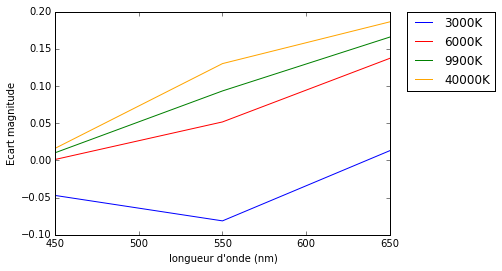

In [16]:
plt.plot([450,550,650],dm_3k,'b', label='3000K')
plt.plot([450,550,650],dm_6k, 'r', label='6000K')
plt.plot([450,550,650],dm_9k,'g', label='9900K')
plt.plot([450,550,650],dm_40k,'orange', label='40000K')
plt.xlabel('longueur d\'onde (nm)')
plt.ylabel('Ecart magnitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Q17:

In [37]:
galaxie=readsav('TD2_Galaxie.save')
print(galaxie.keys())
print(galaxie.galaxie)
print(galaxie.galaxie[0][3][0])

dict_keys(['galaxie'])
[ (array([[ 131.,  133.,  133., ...,  133.,  141.,  129.],
       [ 131.,  136.,  135., ...,  128.,  137.,  132.],
       [ 133.,  131.,  131., ...,  133.,  133.,  134.],
       ..., 
       [ 124.,  126.,  129., ...,  129.,  128.,  131.],
       [ 133.,  136.,  127., ...,  135.,  131.,  133.],
       [ 129.,  125.,  128., ...,  130.,  133.,  136.]], dtype=float32), array([[ 32853.,  32854.,  32861., ...,  32860.,  32857.,  32854.],
       [ 32852.,  32852.,  32850., ...,  32854.,  32854.,  32852.],
       [ 32862.,  32855.,  32862., ...,  32858.,  32855.,  32848.],
       ..., 
       [ 32867.,  32849.,  32857., ...,  32859.,  32857.,  32858.],
       [ 32851.,  32848.,  32858., ...,  32858.,  32853.,  32858.],
       [ 32864.,  32861.,  32852., ...,  32851.,  32857.,  32856.]], dtype=float32), array([[ 32906.,  32899.,  32901., ...,  32908.,  32898.,  32898.],
       [ 32904.,  32917.,  32914., ...,  32904.,  32904.,  32897.],
       [ 32906.,  32899.,  32908.,

/usr/lib/python3/dist-packages/scipy/io/idl.py:167: UserWarning: warning: empty strings are now set to '' instead of None
  warnings.warn("warning: empty strings are now set to '' instead of None")


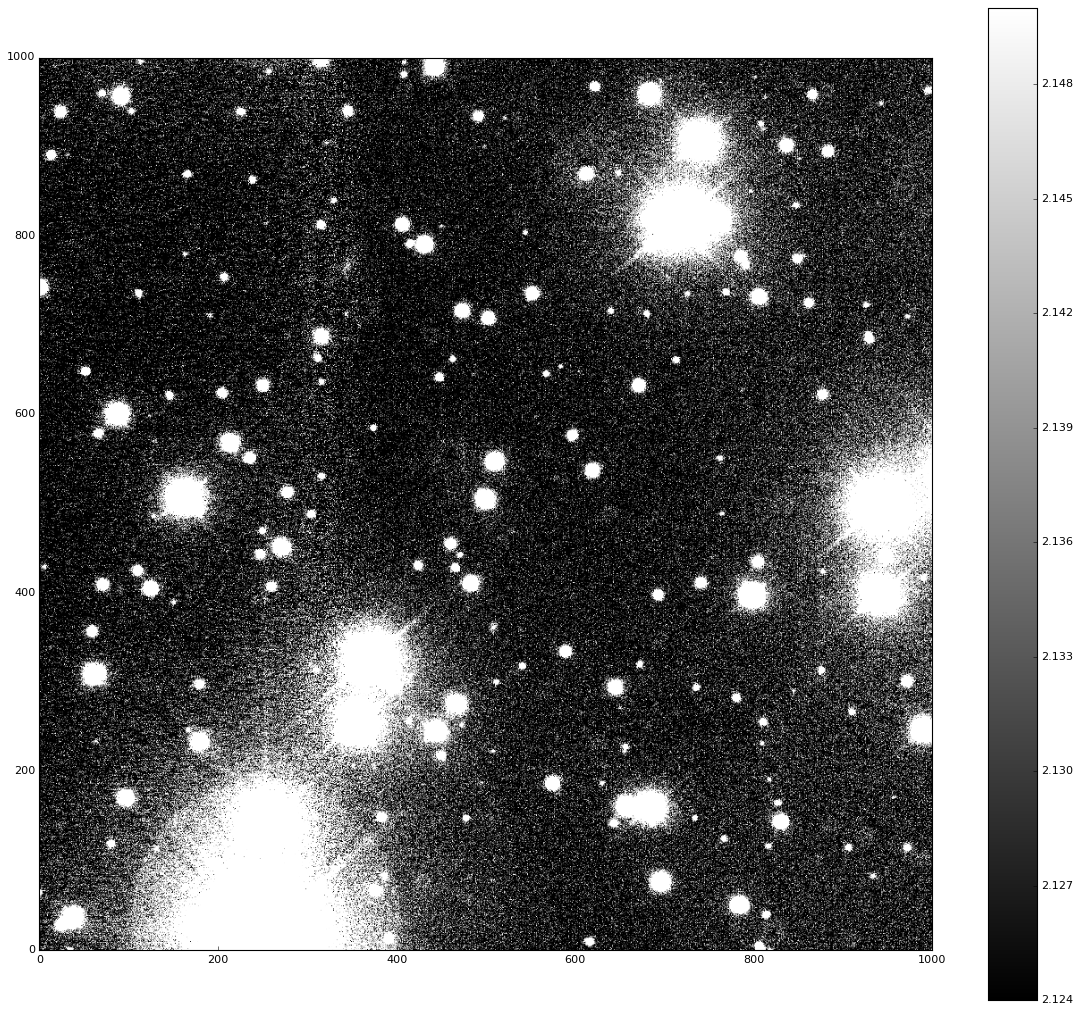

In [63]:

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.log10(galaxie.galaxie.ima_b[0]), cmap='gray', origin='lower', vmin=2.124, vmax=2.15)
plt.colorbar()



Q19: Il s'agit du point diffus en x=343 et y=767
Q20: Pour mesurer la magnitude dans chaque filtre on utilise la formule:
$$m_r=m_{inst} + Z + \kappa M$$
avec $m_{inst}= 100-2.5log_{10}(N)$

In [70]:
magn_galaxie=[]
[Int,Fl,mg]=IMA2.photometrie(galaxie.galaxie.ima_v[0],[345,768],8,15,25,plot=0, exptime=1)
magn_galaxie.append(100-2.5*math.log10(Int)+Zv+kv*(1/math.sin(galaxie.galaxie[0][3][0][1])))
[Int,Fl,mg]=IMA2.photometrie(galaxie.galaxie.ima_b[0],[345,768],8,15,25, plot=0,exptime=1)
magn_galaxie.append(100-2.5*math.log10(Int)+Zb+kb*(1/math.sin(galaxie.galaxie[0][3][0][0])))
[Int,Fl,mg]=IMA2.photometrie(galaxie.galaxie.ima_r[0],[345,768],8,15,25, plot=0,exptime=1)
magn_galaxie.append(100-2.5*math.log10(Int)+Zr+kr*(1/math.sin(galaxie.galaxie[0][3][0][2])))


print('Magnitude(rouge): {0:0.4f}'.format(magn_galaxie[2]))
print('Magnitude(vert): {0:0.4f}'.format(magn_galaxie[0]))
print('Magnitude(bleu): {0:0.4f}'.format(magn_galaxie[1]))


Aires analysées : centre :  197  pixels ; couronne :  1252  pixels
Intensité mesurée :  4757.24920128  ADU
Intensité de la cible :  32881.5126904  ADU/pixel ; Intensité du fond :  32857.3642173  ADU/pixel
Aires analysées : centre :  197  pixels ; couronne :  1252  pixels
Intensité mesurée :  805.420926518  ADU
Intensité de la cible :  135.395939086  ADU/pixel ; Intensité du fond :  131.307507987  ADU/pixel
Aires analysées : centre :  197  pixels ; couronne :  1252  pixels
Intensité mesurée :  15480.6837061  ADU
Intensité de la cible :  32992.8121827  ADU/pixel ; Intensité du fond :  32914.2300319  ADU/pixel
Magnitude(rouge): 15.9130
Magnitude(vert): 17.0238
Magnitude(bleu): 18.6094


Les magnitudes de la galaxie sont très faibles, on a du saturer l'image pour apercevoir celle-ci.


Q21: $taille_{angulaire pixel}= \frac{taille_{linéaire pixel}}{ouverture*diametre} = \frac{15.10^{-6}}{4.8*3.6} =0.18"$